# ASSIGNMENT - 4
# REFERRAL ID - SIRSS2109

### First, let's import the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the csv file for analysis

In [2]:
data = pd.read_csv('penguins_size.csv')
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### Getting general information about our dataset

In [3]:
data.shape

(344, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
data.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

## Data Preprocessing

### Check if there are any duplicate entries or not

In [7]:
data.duplicated().sum()

0

### Check if there are any null values or not

In [8]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Finding mean of the different types of entries so that we can replace them with null values in respective columns 

In [9]:
avg_cul_len = data['culmen_length_mm'].mean()
data['culmen_length_mm'].replace(np.nan,avg_cul_len,inplace=True)

In [10]:
avg_cul_depth = data['culmen_depth_mm'].mean()
data['culmen_depth_mm'].replace(np.nan,avg_cul_depth,inplace=True)

In [11]:
avg_flipper_len = data['flipper_length_mm'].mean()
data['flipper_length_mm'].replace(np.nan,avg_flipper_len,inplace=True)

In [12]:
avg_body_mass_g = data['body_mass_g'].mean()
data['body_mass_g'].replace(np.nan, avg_body_mass_g, inplace=True)

### Here , for categorical column we will find mode and replace our null values with most frequently occuring value

In [13]:
freq_sex = data['sex'].dropna().mode()[0]
data['sex'] = data['sex'].fillna(freq_sex)

In [14]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
data.duplicated().sum()

0

## Exploratory Data Analysis

### Now we will replace our categorical values in sex columns with numerical values

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

### Checking total count of different species

In [17]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

### Countplot shows the counts of observations in each categorical bin using bars. Here we will get count of different species 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

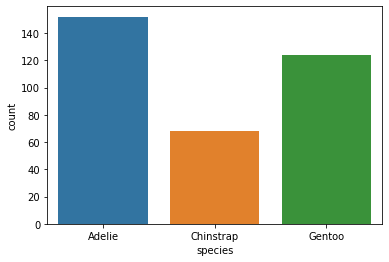

In [18]:
sns.countplot(data['species'],data = data)

### A Violin Plot is used to visualise the distribution of the data and its probability density.

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

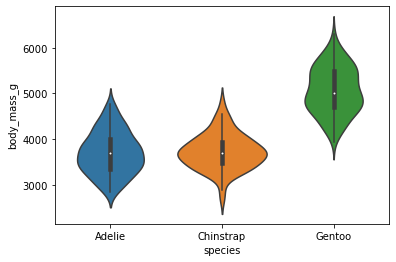

In [19]:
sns.violinplot(x = 'species',y = 'body_mass_g',data = data)

### Here, In this violin plot we will get distribution of species based on flipper length of penguine(length of wings)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

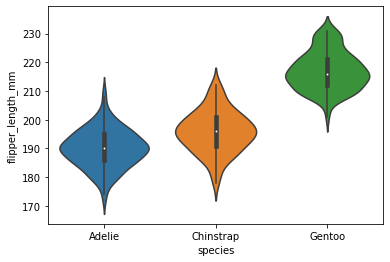

In [20]:
sns.violinplot(x='species',y='flipper_length_mm',data = data)

### In this count plot, we will get count of different species based on their sex, This plot will help us to get a percentage of male and female of species .

<AxesSubplot:xlabel='species', ylabel='count'>

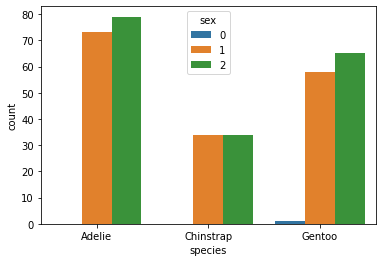

In [21]:
sns.countplot(x = data['species'],hue='sex',data = data)

### In lineplot() Draw a line plot with the possibility of several semantic groupings. These parameters control what visual semantics are used to identify the different subsets. 

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

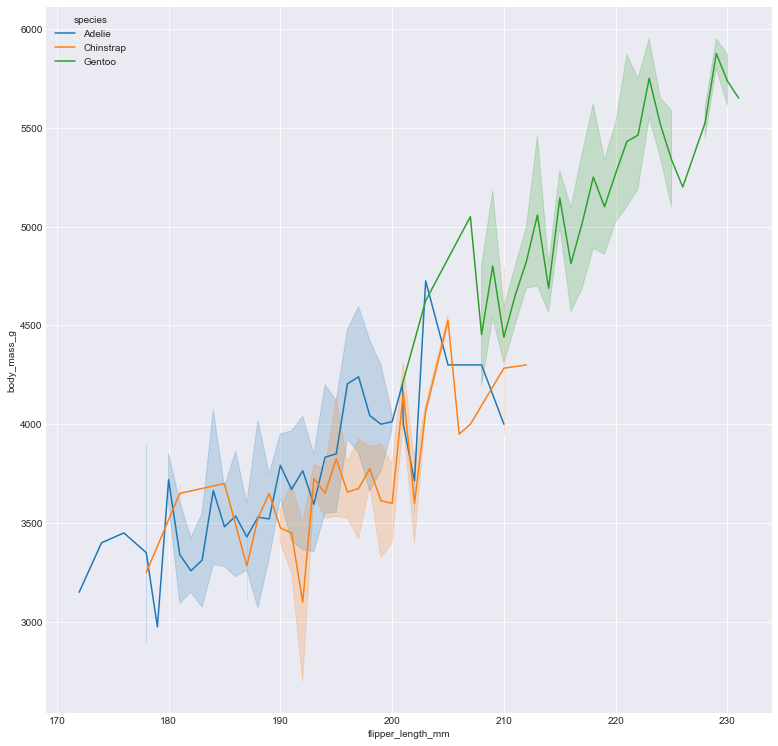

In [22]:
plt.figure(figsize=(13,13))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x='flipper_length_mm',y='body_mass_g',hue='species',data = data)

### This countplot will help us to get an idea about count of species in different islands. This will help us to analyze that which species is maximum or minimum on a particular island. 

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

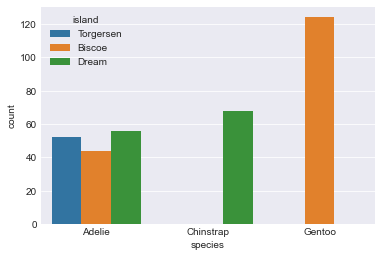

In [23]:
sns.countplot(data['species'],hue='island',data = data)

### This plot will distribute species based on body mass on different island which will help us to analyze that body mass is also a factor on different island irrespective of species or not.

<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

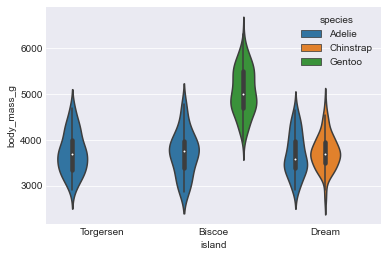

In [24]:
sns.violinplot(x='island',y='body_mass_g',hue='species',data = data)

### Storing independent parameters in X and dependent parameters in Y

In [25]:
X = data.iloc[:,:-2].values
Y = data.iloc[:,-2].values

### Performing normaliztion

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,2:] = sc.fit_transform(X[:,2:])
X

array([['Adelie', 'Torgersen', -0.8870812256081303, 0.7877425146261609,
        -1.4224878162524117],
       ['Adelie', 'Torgersen', -0.8134939891378182, 0.12655632998808022,
        -1.0653516885484589],
       ['Adelie', 'Torgersen', -0.666319516197194, 0.4317191844364257,
        -0.42250665868134385],
       ...,
       ['Gentoo', 'Biscoe', 1.1917582046781932, -0.7380717576155629,
        1.5060284309200014],
       ['Gentoo', 'Biscoe', 0.23512413056413334, -1.1958160392880792,
        0.7917561755120958],
       ['Gentoo', 'Biscoe', 1.0997741590903027, -0.5346298546499986,
        0.8631834010528863]], dtype=object)

### Checking co-relation of different parameters.

In [27]:
data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110,0.317298
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.358666
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.227461
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.393681
sex,0.317298,0.358666,0.227461,0.393681,1.000000


### A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions.

<AxesSubplot:>

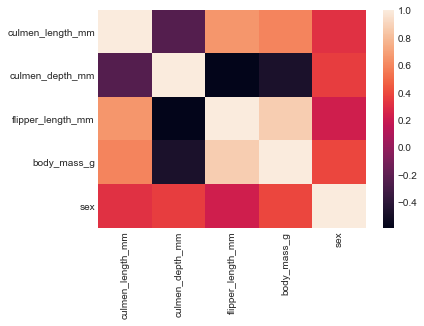

In [28]:
sns.heatmap(data.corr())